In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

# Read csv file
banknotes = pd.read_csv('datasets/banknotes.csv')
banknotes.head()

2023-05-29 04:36:52.440960: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-29 04:36:52.440982: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [2]:
# Features and labels
X = np.array(banknotes.drop('class', axis=1),dtype=np.float32)
y = np.array(banknotes['class'], dtype=np.float32)

In [3]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.3,
                                                   random_state=42)

In [4]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Define a model
model = Sequential()

# Add hidden layer
model.add(Dense(2, activation='relu', input_shape=(4,)))

# Add output layer
model.add(Dense(1, activation='sigmoid'))

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


2023-05-29 04:36:54.127743: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-29 04:36:54.127764: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-29 04:36:54.127778: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (a4851d6a-23be-40b0-8e7f-fc6b19b2ddb2): /proc/driver/nvidia/version does not exist
2023-05-29 04:36:54.127965: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Accessing Keras layers

In [5]:
# Accessing the first layer of a Keras model
first_layer = model.layers[0]
first_layer

In [6]:
# Printing the layer, and its input, output and weights
print(first_layer.input)
print()

print(first_layer.output)
print()

print(first_layer.weights)

KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name='dense_input'), name='dense_input', description="created by layer 'dense_input'")

KerasTensor(type_spec=TensorSpec(shape=(None, 2), dtype=tf.float32, name=None), name='dense/Relu:0', description="created by layer 'dense'")

[<tf.Variable 'dense/kernel:0' shape=(4, 2) dtype=float32, numpy=
array([[ 0.5656314 ,  0.84513974],
       [ 0.5800748 , -0.5459807 ],
       [ 0.88850975,  0.21053195],
       [-0.74501467, -0.8570614 ]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]


# Keras backend
- If we import the Keras backend we can build a function that takes in an input tensor from a given layer and returns an output tensor from another or the same layer. 

In [7]:
# Import keras backend
import tensorflow.keras.backend as K

# Get the input and output tensors of a model layer
inp = model.layers[0].input
out = model.layers[0].output

# Function that maps layer inputs to outputs
inp_to_out = K.function([inp], [out])

# We pass an input and get the output we'd get in that first layer
print(inp_to_out([X_train]))

[array([[0.07202327, 0.        ],
       [1.2254579 , 1.0820012 ],
       [5.4423685 , 0.        ],
       ...,
       [4.940192  , 0.        ],
       [0.5084224 , 0.        ],
       [4.492264  , 4.0133495 ]], dtype=float32)]


**The output suggests:** For 4 features as the input in the first layer, since the output nodes are 2, so for every 4 features, 2 output are generated.  

## Neural separation
- Neurons learn by updating their weights to output values that help them better distinguish between the different output classes in your dataset. You will make use of the `inp_to_out()` function you just built to visualize the output of two neurons in the first layer of the Banknote Authentication `model` as it learns.

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
import matplotlib.pyplot as plt

def plot():
  fig, ax = plt.subplots()
  plt.scatter(layer_output[:, 0], layer_output[:, 1],c = y_test,edgecolors='none')
  plt.title('Epoch: {}, Test Accuracy: {:3.1f} %'.format(i+1, test_accuracy * 100.0))
  plt.show()

13/13 [==============================] - 0s 826us/step - loss: 0.6614 - accuracy: 0.7112


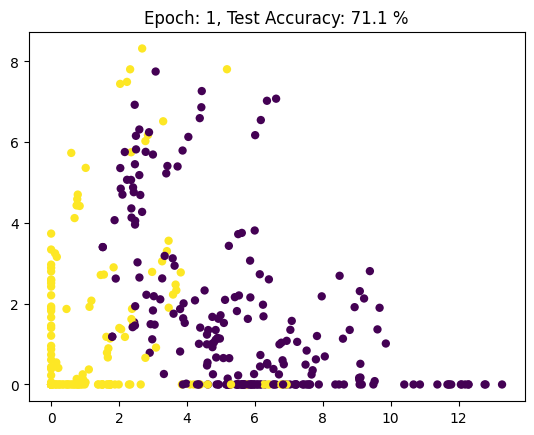

13/13 [==============================] - 0s 769us/step - loss: 0.4261 - accuracy: 0.8422


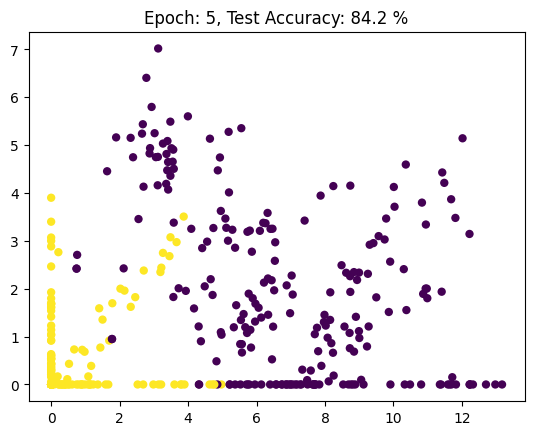

13/13 [==============================] - 0s 761us/step - loss: 0.3132 - accuracy: 0.9393


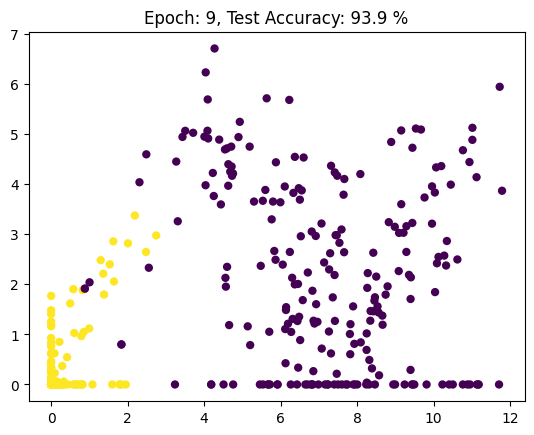

13/13 [==============================] - 0s 758us/step - loss: 0.2478 - accuracy: 0.9733


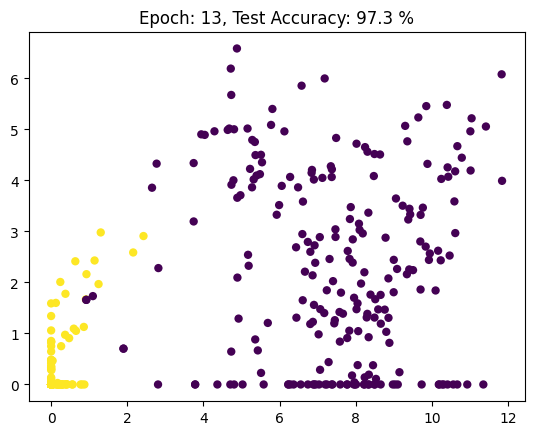

13/13 [==============================] - 0s 773us/step - loss: 0.2055 - accuracy: 0.9830


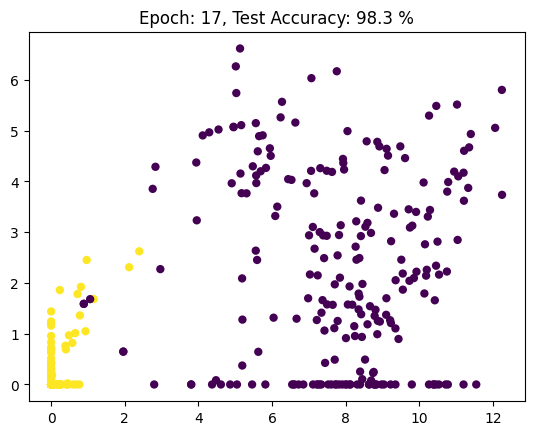

13/13 [==============================] - 0s 767us/step - loss: 0.1743 - accuracy: 0.9903


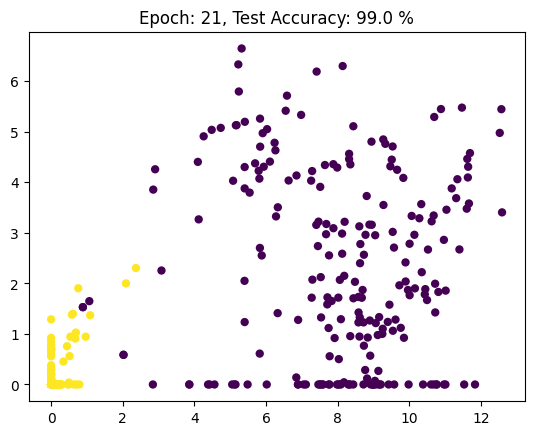

In [10]:
for i in range(0, 21):
  	# Train model for 1 epoch
    h = model.fit(X_train, y_train, batch_size = 16, epochs = 1, verbose = 0)
    if i%4==0: 
      # Get the output of the first layer
      layer_output = inp_to_out([X_test])[0]
      
      # Evaluate model accuracy for this epoch
      test_accuracy = model.evaluate(X_test, y_test)[1] 
      
      # Plot 1st vs 2nd neuron output
      plot()

# Autoencoders 
![image-8](image-8.png)


## Building an autoencoder
- Autoencoders have several interesting applications like anomaly detection or image denoising. 
- They aim at producing an output identical to its inputs. The input will be compressed into a lower dimensional space, encoded. The model then learns to decode it back to its original form.

You will encode and decode the MNIST dataset of handwritten digits, the hidden layer will encode a 32-dimensional representation of the image, which originally consists of 784 pixels (28 x 28). The autoencoder will essentially learn to turn the 784 pixels original image into a compressed 32 pixels image and learn how to use that encoded representation to bring back the original 784 pixels image.

In [11]:
import zipfile

# Specify the path to the zip file
zip_path = 'datasets/MNIST.zip'

# Specify the directory where you want to extract the files
extract_path = 'datasets/MNIST'

# Open the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extract all the contents of the zip file to the extract directory
    zip_ref.extractall(extract_path)

print("Unzip complete!")


Unzip complete!


In [12]:
# Specify the path to the .npy file
X_test_MNIST_noise = 'datasets/MNIST/X_test_MNIST_noise.npy'
X_test_MNIST = 'datasets/MNIST/X_test_MNIST.npy'
y_test = 'datasets/MNIST/y_test_MNIST.npy'

# Load the .npy file
X_test_MNIST_noise = np.load(X_test_MNIST_noise)
X_test_MNIST = np.load(X_test_MNIST)
y_test = np.load(y_test)

In [13]:
X_test_MNIST

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
X_test_MNIST_noise = X_test_MNIST_noise.astype(np.float32)
X_test_MNIST_noise

array([[0.        , 0.13035677, 0.        , ..., 0.66030353, 0.01190928,
        0.        ],
       [0.        , 0.        , 0.27230328, ..., 0.21741264, 0.62852275,
        0.17289227],
       [0.        , 0.12998194, 0.        , ..., 0.        , 0.4502293 ,
        0.03336608],
       ...,
       [0.08544555, 0.21401903, 0.41607752, ..., 0.        , 0.        ,
        0.1249689 ],
       [0.6019124 , 0.74493223, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.45770842, ..., 0.24661694, 0.        ,
        0.02334947]], dtype=float32)

In [15]:
y_test.shape

(100,)

In [16]:
# Create a df of output
y_test_df = pd.DataFrame(y_test)
y_test = np.array(pd.get_dummies(y_test_df[0]), dtype=np.float32)

In [17]:
# Start with a sequential model
autoencoder = Sequential()

# Add a dense layer with input the original image pixels and neurons the encoded representation
autoencoder.add(Dense(32, input_shape=(784, ), activation="relu"))

# Add an output layer with as many neurons as the orginal image pixels
autoencoder.add(Dense(784, activation = "sigmoid"))

# Compile your model with adadelta
autoencoder.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                    loss = 'binary_crossentropy', metrics=['accuracy'])

# Fit the model --> training on actual noise-less image such that the model can take in noisy image and produce noise-less image thereafter
autoencoder.fit(X_test_MNIST, X_test_MNIST, epochs=20, batch_size=25)

# Summarize your model structure
autoencoder.summary()

Epoch 1/20
4/4 [==============================] - 0s 2ms/step - loss: 0.6017 - accuracy: 0.0000e+00
Epoch 2/20
4/4 [==============================] - 0s 2ms/step - loss: 0.3351 - accuracy: 0.0000e+00
Epoch 3/20
4/4 [==============================] - 0s 2ms/step - loss: 0.2889 - accuracy: 0.0200
Epoch 4/20
4/4 [==============================] - 0s 2ms/step - loss: 0.2761 - accuracy: 0.0100
Epoch 5/20
4/4 [==============================] - 0s 1ms/step - loss: 0.2617 - accuracy: 0.0100
Epoch 6/20
4/4 [==============================] - 0s 1ms/step - loss: 0.2417 - accuracy: 0.0400
Epoch 7/20
4/4 [==============================] - 0s 1ms/step - loss: 0.2282 - accuracy: 0.0200
Epoch 8/20
4/4 [==============================] - 0s 2ms/step - loss: 0.2158 - accuracy: 0.0500
Epoch 9/20
4/4 [==============================] - 0s 1ms/step - loss: 0.2048 - accuracy: 0.0100
Epoch 10/20
4/4 [==============================] - 0s 1ms/step - loss: 0.1957 - accuracy: 0.0300
Epoch 11/20
4/4 [==============

## De-noising like an autoencoder

In [18]:
# Build your encoder by using the first layer of your autoencoder
encoder = Sequential()
encoder.add(autoencoder.layers[0])
print(encoder.summary())

# Encode the noisy images and show the encodings for your favorite number [0-9]
encodings = encoder.predict(X_test_MNIST_noise)
encodings

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________
None
4/4 [==============================] - 0s 932us/step


array([[ 4.468428  ,  1.5176235 ,  0.        , ...,  1.4407067 ,
         0.        ,  0.        ],
       [ 4.5517254 ,  2.0689104 ,  0.        , ...,  3.0616171 ,
         0.        ,  6.0531216 ],
       [ 2.5332654 ,  3.0810623 ,  0.        , ...,  3.2787392 ,
         0.        ,  0.96931446],
       ...,
       [ 4.879767  ,  4.735662  ,  0.        , ...,  3.8002028 ,
         0.        ,  0.        ],
       [ 2.848747  ,  0.07455836,  0.        , ...,  0.72524035,
         0.        , 10.310363  ],
       [ 7.293894  ,  6.192214  ,  0.        , ...,  0.3064319 ,
         0.        ,  2.3801877 ]], dtype=float32)

In [19]:
encodings.shape

(100, 32)

**Note:** "encoder" model is encoding noisy image of shape (100,784) into (100,32).

In [20]:
# Predict on the noisy images with your autoencoder i.e decoding 
decoded_imgs = autoencoder.predict(X_test_MNIST_noise)
decoded_imgs.shape

4/4 [==============================] - 0s 941us/step


(100, 784)

### Visualizing the "Actual noise-less image", "Actual noisy image", "Encoded image" & "Decoded image or Noise-free img"

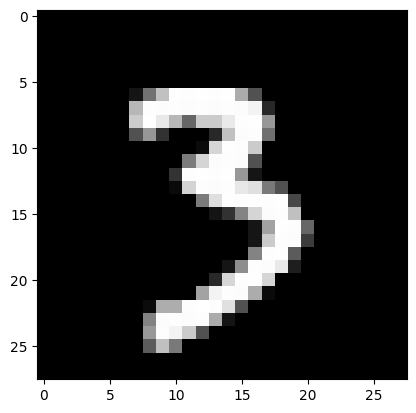

In [27]:
# Plotting noise-less image
plt.imshow(X_test_MNIST[30,:].reshape(28,28),cmap='gray')
plt.show()

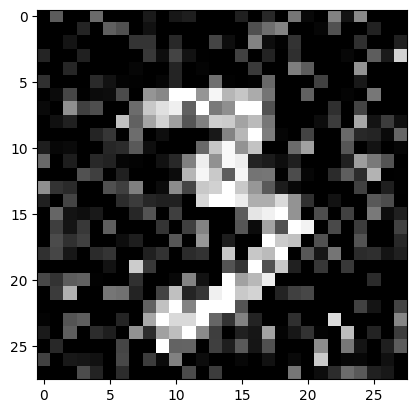

In [28]:
# Plotting noisy image 
plt.imshow(X_test_MNIST_noise[30,:].reshape(28,28), cmap='gray')
plt.show()

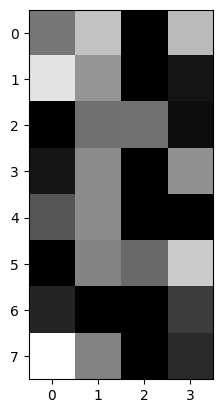

In [29]:
# Plotting image after encoding
plt.imshow(encodings[30,:].reshape(8,4),cmap='gray')
plt.show()

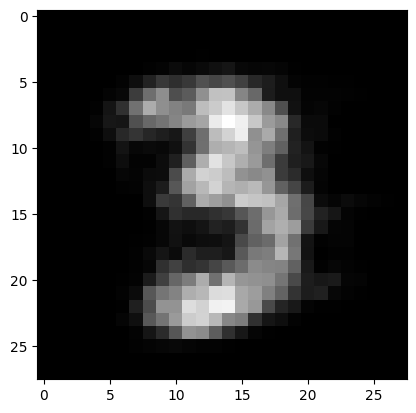

In [30]:
# Plotting image after decoding or afer removing of noise
plt.imshow(decoded_imgs[30,:].reshape(28,28),cmap='gray')
plt.show()

# Into to CNNs

![CNN.gif](CNN.gif)

In [60]:
# Import the Conv2D and Flatten layers and instantiate model
from tensorflow.keras.layers import Conv2D,Flatten
model = Sequential()

# Add a convolutional layer of 32 filters of size 3x3
model.add(Conv2D(32, kernel_size = 3, input_shape = (28, 28, 1), activation = 'relu'))

# Add a convolutional layer of 16 filters of size 3x3
model.add(Conv2D(16, kernel_size = 3, activation = 'relu'))

# Flatten the previous layer output
model.add(Flatten())

# Add as many outputs as classes with softmax activation
model.add(Dense(10, activation = 'softmax'))

# Summary of the model
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 16)        4624      
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                92170     
                                                                 
Total params: 97,114
Trainable params: 97,114
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

# Fit the model, train using noise-less MNIST data
model.fit(X_test_MNIST.reshape(-1,28,28,1), y_test, epochs=5, batch_size=15)

Epoch 1/5
7/7 [==============================] - 0s 10ms/step - loss: 2.0550 - accuracy: 0.3700
Epoch 2/5
7/7 [==============================] - 0s 16ms/step - loss: 0.3846 - accuracy: 0.9100
Epoch 3/5
7/7 [==============================] - 0s 16ms/step - loss: 0.0686 - accuracy: 0.9900
Epoch 4/5
7/7 [==============================] - 0s 16ms/step - loss: 0.0245 - accuracy: 0.9800
Epoch 5/5
7/7 [==============================] - 0s 16ms/step - loss: 0.0024 - accuracy: 1.0000


In [62]:
# Predict on noisy set
pred = model.predict(X_test_MNIST_noise.reshape(-1,28,28,1))

# Evaluate
model.evaluate(X_test_MNIST_noise.reshape(-1,28,28,1), y_test)

4/4 [==============================] - 1s 2ms/step - loss: 0.0140 - accuracy: 1.0000


[0.014039662666618824, 1.0]

In [63]:
pred.shape

(100, 10)

In [64]:
# Find the indices of the highest values along each row
max_indices = np.argmax(pred, axis=1)

# Thus final MNIST prediction
max_indices

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9])

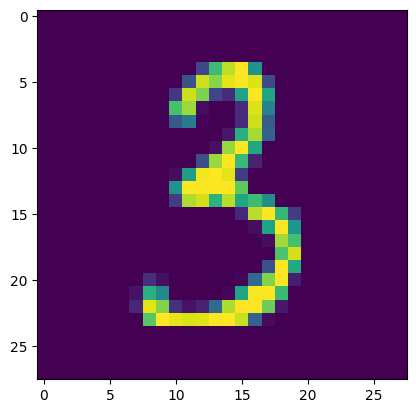

The predicted MNIST from the given input image:  3


In [65]:
# Visualize 

# Actual input
plt.imshow(X_test_MNIST[76].reshape(28,28,1))
plt.show()

# Predicted output from the image
print("The predicted MNIST from the given input image: ",max_indices[76])

# ResNet50 model
- ResNet50 is a 50 layer-deep model that performs well on the Imagenet Dataset, a huge dataset of more than 14 million images. ResNet50 can distinguish between 1000 different classes. This model would take too long to train on a regular computer, but Keras makes it easy for us to use it. We just need to prepare the image we want to classify for the model, predict the processed image, and decode the predictions!

## Pre-processing images for ResNet50

In [71]:
# Import image from keras preprocessing
from tensorflow.keras.preprocessing import image

# Import preprocess_input from tensorflow keras applications resnet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load the image with the right target size for your model
img = image.load_img('dog.png', target_size=(224,224))

# Turn it into an array
img = image.img_to_array(img)

# Expand the dimensions so that it's understood by the network:
# img.shape turns from (224,224,3) into (1,224,244,3)
img = np.expand_dims(img, axis=0)

# Pre-process the img in the same way training images were
img = preprocess_input(img)

## Using the ResNet50 model in Keras

In [75]:
# Import ResNet50 and decode_predictions from tensorflow.keras.applications.resnet50
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions

# Instantiate a ResNet50 model with imagenet weights
model = ResNet50(weights='imagenet')

In [76]:
# Predict with ResNet50 on our img
preds = model.predict(img)

# Decode predictions and print it
print('Predicted:', decode_predictions(preds, top=1)[0])

35363/35363 [==============================] - 0s 0us/step
Predicted: [('n02088364', 'beagle', 0.9073767)]


# Intro to LSTMs
![image-11](image-11.png)

- LSTMs are a type of recurrent neural network, RNN for short. A simple RNN is a neural network that can use past predictions in order to infer new ones. This allows us to solve problems where there is a dependence on past inputs.

![image-10](image-10.png)


![LSTM.gif](LSTM.gif)

## Use LSTMs with text data to predict the next word in a sentence!

In [12]:
text = 'it is not the strength of the body but the strength of the spirit it is useless to meet revenge with revenge it will heal nothing even the smallest person can change the course of history all we have to decide is what to do with the time that is given us the burned hand teaches best after that advice about fire goes to the heart'

# We chosse a sequence length 
# With a sequence length of 4 we will end up feeding our model with two words and it will predict the third one. 
seq_len = 4

# Split text into a list of words
words = text.split()
print(words)

['it', 'is', 'not', 'the', 'strength', 'of', 'the', 'body', 'but', 'the', 'strength', 'of', 'the', 'spirit', 'it', 'is', 'useless', 'to', 'meet', 'revenge', 'with', 'revenge', 'it', 'will', 'heal', 'nothing', 'even', 'the', 'smallest', 'person', 'can', 'change', 'the', 'course', 'of', 'history', 'all', 'we', 'have', 'to', 'decide', 'is', 'what', 'to', 'do', 'with', 'the', 'time', 'that', 'is', 'given', 'us', 'the', 'burned', 'hand', 'teaches', 'best', 'after', 'that', 'advice', 'about', 'fire', 'goes', 'to', 'the', 'heart']


In [14]:
# Turn these words into consecutive lines of 4 words
lines = []
for i in range(seq_len, len(words)+1):
    line = ' '.join(words[i-seq_len:i])
    lines.append(line)
    
print(lines)

['it is not the', 'is not the strength', 'not the strength of', 'the strength of the', 'strength of the body', 'of the body but', 'the body but the', 'body but the strength', 'but the strength of', 'the strength of the', 'strength of the spirit', 'of the spirit it', 'the spirit it is', 'spirit it is useless', 'it is useless to', 'is useless to meet', 'useless to meet revenge', 'to meet revenge with', 'meet revenge with revenge', 'revenge with revenge it', 'with revenge it will', 'revenge it will heal', 'it will heal nothing', 'will heal nothing even', 'heal nothing even the', 'nothing even the smallest', 'even the smallest person', 'the smallest person can', 'smallest person can change', 'person can change the', 'can change the course', 'change the course of', 'the course of history', 'course of history all', 'of history all we', 'history all we have', 'all we have to', 'we have to decide', 'have to decide is', 'to decide is what', 'decide is what to', 'is what to do', 'what to do with

## Text preparation in Keras

In [16]:
# Import Tokenizer from keras preprocessing text
from tensorflow.keras.preprocessing.text import Tokenizer

# Instantiate Tokenizer
tokenizer = Tokenizer()

# Fit it on the previous lines
tokenizer.fit_on_texts(lines)

# Turn the lines into numeric sequences
sequences = tokenizer.texts_to_sequences(lines)
print(sequences)

[[5, 3, 43, 1], [3, 43, 1, 6], [43, 1, 6, 4], [1, 6, 4, 1], [6, 4, 1, 10], [4, 1, 10, 11], [1, 10, 11, 1], [10, 11, 1, 6], [11, 1, 6, 4], [1, 6, 4, 1], [6, 4, 1, 12], [4, 1, 12, 5], [1, 12, 5, 3], [12, 5, 3, 13], [5, 3, 13, 2], [3, 13, 2, 14], [13, 2, 14, 7], [2, 14, 7, 8], [14, 7, 8, 7], [7, 8, 7, 5], [8, 7, 5, 15], [7, 5, 15, 16], [5, 15, 16, 17], [15, 16, 17, 18], [16, 17, 18, 1], [17, 18, 1, 19], [18, 1, 19, 20], [1, 19, 20, 21], [19, 20, 21, 22], [20, 21, 22, 1], [21, 22, 1, 23], [22, 1, 23, 4], [1, 23, 4, 24], [23, 4, 24, 25], [4, 24, 25, 26], [24, 25, 26, 27], [25, 26, 27, 2], [26, 27, 2, 28], [27, 2, 28, 3], [2, 28, 3, 29], [28, 3, 29, 2], [3, 29, 2, 30], [29, 2, 30, 8], [2, 30, 8, 1], [30, 8, 1, 31], [8, 1, 31, 9], [1, 31, 9, 3], [31, 9, 3, 32], [9, 3, 32, 33], [3, 32, 33, 1], [32, 33, 1, 34], [33, 1, 34, 35], [1, 34, 35, 36], [34, 35, 36, 37], [35, 36, 37, 38], [36, 37, 38, 9], [37, 38, 9, 39], [38, 9, 39, 40], [9, 39, 40, 41], [39, 40, 41, 42], [40, 41, 42, 2], [41, 42, 2, 1

In [17]:
print(tokenizer.index_word)

{1: 'the', 2: 'to', 3: 'is', 4: 'of', 5: 'it', 6: 'strength', 7: 'revenge', 8: 'with', 9: 'that', 10: 'body', 11: 'but', 12: 'spirit', 13: 'useless', 14: 'meet', 15: 'will', 16: 'heal', 17: 'nothing', 18: 'even', 19: 'smallest', 20: 'person', 21: 'can', 22: 'change', 23: 'course', 24: 'history', 25: 'all', 26: 'we', 27: 'have', 28: 'decide', 29: 'what', 30: 'do', 31: 'time', 32: 'given', 33: 'us', 34: 'burned', 35: 'hand', 36: 'teaches', 37: 'best', 38: 'after', 39: 'advice', 40: 'about', 41: 'fire', 42: 'goes', 43: 'not', 44: 'heart'}


## Building a LSTM model

In [19]:
# Import Dense, LSTM and Embedding layers
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.models import Sequential

model = Sequential()

# Vocabulary size
vocab_size = len(tokenizer.index_word)
vocab_size

44

In [20]:
# We add an embedding layer, the input_dim is the vocab_size variable, we will turn our word numbers into 8-dimensional vectors, and need to declare the input_length so that our model understand that 3 words will be passed simultaneously as a sequence. 

# Starting with an embedding layer
model.add(Embedding(input_dim=vocab_size, 
                   output_dim=8,
                   input_length=3))

In [21]:
# We end by adding an LSTM layer of 32 units, a hidden layer, and an output layer with softmax and as many outputs as possible words.

# Adding an LSTM layer
model.add(LSTM(32))

# Adding a Dense hidden layer
model.add(Dense(32, activation='relu'))
# Adding an output layer with softmax
model.add(Dense(vocab_size, activation='softmax'))

# Model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 3, 8)              352       
                                                                 
 lstm_1 (LSTM)               (None, 32)                5248      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 44)                1452      
                                                                 
Total params: 8,108
Trainable params: 8,108
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy')

## Decode your prediction

In [24]:
def predict_text(test_text, model = model):
  if len(test_text.split()) != 3:
    print('Text input should be 3 words!')
    return False
  
  # Turn the test_text into a sequence of numbers
  test_seq = tokenizer.texts_to_sequences([test_text])
  test_seq = np.array(test_seq)
  
  # Use the model passed as a parameter to predict the next word
  pred = model.predict(test_seq).argmax(axis = 1)[0]
  
  # Return the word that maps to the prediction
  return tokenizer.index_word[pred]

## Test your model

In [27]:
predict_text('meet revenge with')

1/1 [==============================] - 0s 12ms/step


'advice'

In [28]:
predict_text('the course of')

1/1 [==============================] - 0s 12ms/step


'even'

In [29]:
predict_text('strength of the')

1/1 [==============================] - 0s 40ms/step


'heal'